In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import scipy.io
from scipy import stats
from sklearn.naive_bayes import MultinomialNB

In [2]:
mat = scipy.io.loadmat('data.mat')

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Dec  5 18:00:48 2018',
 '__version__': '1.0',
 '__globals__': [],
 'F1': array([[ 7.90543045,  9.03548961,  4.53489091, 14.16683497, 11.88347036],
        [ 6.60370731, 10.29896573,  1.99880063, 12.68755326, 10.39232245],
        [ 6.10896036,  7.10180666,  3.6290366 , 12.60627281, 12.20593245],
        ...,
        [ 5.51959563,  8.05812131,  3.20857723, 12.48202388, 11.01627179],
        [ 9.37874365, 10.00443538,  8.05460477, 14.75110443, 13.04608571],
        [ 3.1119946 ,  5.33038517, -0.76241982, 10.70181844,  6.50224691]]),
 'F2': array([[1.15552173, 5.97631978, 1.16612037, 3.40406767, 1.21352697],
        [1.39738885, 6.12634738, 2.70301481, 3.19363103, 0.44655667],
        [1.64427344, 4.05758523, 1.85129124, 2.4391763 , 0.51799572],
        ...,
        [1.77629716, 6.43822583, 1.76304902, 2.44898151, 0.82978268],
        [1.82399817, 5.27738683, 1.37666548, 2.73968526, 0.10886404],
        [1.32098527, 

--- 
 ## Step 1

In [72]:
for i in mat["F1"][0:3]:
    print(i)

[ 7.90543045  9.03548961  4.53489091 14.16683497 11.88347036]
[ 6.60370731 10.29896573  1.99880063 12.68755326 10.39232245]
[ 6.10896036  7.10180666  3.6290366  12.60627281 12.20593245]


In [73]:
average_var = []
average_mean = []
#calculate columns
for i in range(0,5):
    F1 = np.array(mat["F1"][0:100,[i]])
    var_f1 = np.var(F1)
    mean_f1 = np.mean(F1)
#     print("F1",F1,i)
    average_var.append(var_f1)
    average_mean.append(mean_f1)

In [74]:
average_var

[4.242083092666572,
 5.264687407441236,
 5.087568385990322,
 3.760788754269051,
 4.022309590554696]

In [75]:
average_mean

[7.093276745822095,
 9.144547521590674,
 4.287691491993289,
 13.33749006747352,
 11.24185889702683]

---

In [8]:
average_var_F2 = []
average_mean_F2 = []
#calculate columns
for i in range(0,5):
    F1 = np.array(mat["F2"][0:100][i]) 
    var_f1 = np.var(F1)
    mean_f1 = np.mean(F1)
    average_var_F2.append(var_f1)
    average_mean_F2.append(mean_f1)

In [9]:
average_var_F2

[3.6218939273527773,
 3.7462821806188096,
 1.3438878911217302,
 3.6615895883001244,
 0.981498148244045]

In [10]:
average_mean_F2

[2.583111303354113,
 2.773387746952918,
 2.102064386353135,
 2.7670334010960103,
 2.0691732772222196]

---

## Step 2
Assume that 𝑋 = 𝐹1.<br>Using the Bayes' theorem, calculate theprobability of each class for data ofthe remaining subjects (columns 101-1000of 𝐹1)and consequently predict the class for each data point. <br>Note that each subjectperformed 5 differenttasks so you need to predict the class of 4500 data points.

In [11]:
F1 = np.array(mat["F1"])
F2 = np.array(mat["F2"])

In [12]:
step1_F1 = {}
for i in range(0,5):
    step1_F1["m" + str(i+1) ] = average_mean[i]
    step1_F1["var" + str(i+1) ] = average_var[i]
    

In [13]:
#step 2.1
def testing_data(data):
    list7=[]
    for i in range(100,1000):
        list7.append(list(data[i]))
    return list7
#拿取data from100-1000，data填写F1或者F2之类的

In [14]:
#getting prediction
# data是單一資料
def prediction(data, mean_var):
    pro = []
    for k in range(1,6):
        pro.append(stats.norm.pdf(data, mean_var['m'+str(k)], np.sqrt(mean_var['var'+str(k)])))
            #stats.norm.pdf（X,mean,stander deviation）
    prediction = np.argmax(pro)+1
    return prediction
# data是每次输入的单一数据点
# mean_var是给X的东西，里面是F1或F2的mean和var，我这里是一个dictionary

In [15]:
#step 2.2
test_F1 = testing_data(F1)
#test_F1是截取下来的101-1000的data，是一个大list包着900个小list
orignal = []
pred = []
for i in range(900):
    data1 = test_F1[i]
    for j in range(5):
        orignal.append(j+1)
        data2 = data1[j]
        pred.append(prediction(data2,step1_F1))
        #step1_F1是我的F1的mean和var
right = 0
for num in range(len(pred)):
    if pred[num] == orignal[num]:
        right = right + 1
acc = right / 4500
err = (4500-right) / 4500
print('Classification accuracy = '+str(acc))
print('Error rate = '+str(err))

Classification accuracy = 0.53
Error rate = 0.47


In [16]:
test_F1[1][1]

6.541370816037187

In [17]:
step1_F1

{'m1': 7.093276745822095,
 'var1': 4.242083092666572,
 'm2': 9.144547521590674,
 'var2': 5.264687407441236,
 'm3': 4.287691491993289,
 'var3': 5.087568385990322,
 'm4': 13.33749006747352,
 'var4': 3.760788754269051,
 'm5': 11.24185889702683,
 'var5': 4.022309590554696}

---

## Step 3


Calculate 𝑍1(the  standard  normal  of𝐹1)  
<br>
plot  the  distribution  of  the  data  using 𝑍1and 𝐹2
<br>
and compare it to the distribution in 𝐹1and 𝐹2shown on right.

In [18]:
# Fi is dataset, stepi_Fi is information of mean and variance
def create_zi( Fi , stepi_Fi  ): 
    Zi = [] 
    
    for i in range(0,len(F1)): 
        z_column = []
        for j in range(0, 5): 
            average_mean = stepi_Fi["m" + str(j+1)]
            average_var = stepi_Fi["var" + str(j+1)] 
            zi_c =( Fi[i,:][j]- average_mean) / average_var    
            z_column.append(zi_c)
        Zi.append(z_column)
    return Zi
Z1= create_zi(F1, step1_F1)
# Z1 = np.transpose(Z1)

In [19]:
# Preprocess data to it's classified value
# 3.43543 -> 3
def classified_z(F1,step1_F1):
    classified_z = []
    for i in range(0, 1000):
        local_classified_z = []

        for j in range(0,5):
    #         print("j" , j)
    #         print("i" , i) 
    #         print(F1[i][:]) 
            temp_z = prediction(F1[i][j], step1_F1) 
            local_classified_z.append(temp_z)
        classified_z.append(local_classified_z)
    return classified_z
classified = classified_z(F1,step1_F1)

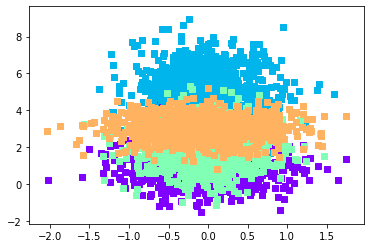

In [50]:
colors = cm.rainbow(np.linspace(0, 1, 5))

for i in range(0,4):
    for j in range(0,1000):
        if classified[j][i] == 4:
            plt.scatter(Z1[j][i], F2[j][i], color = colors[i], marker = "," )#,  alpha =0.1
        elif classified[j][i] == 3:
            plt.scatter(Z1[j][i], F2[j][i], color = colors[i], marker = "," )#,  alpha =0.1
        elif classified[j][i] == 2:  
            plt.scatter(Z1[j][i], F2[j][i], color = colors[i], marker = "," )#,  alpha =0.1
        elif classified[j][i] == 1:  
            plt.scatter(Z1[j][i], F2[j][i], color = colors[i], marker = "," )#,  alpha =0.1 
        elif classified[j][i] == 5:   
            plt.scatter(Z1[j][i], F2[j][i], color = colors[i], marker = "," )#,  alpha =0.1

plt.savefig("normalized Z1F2.png")

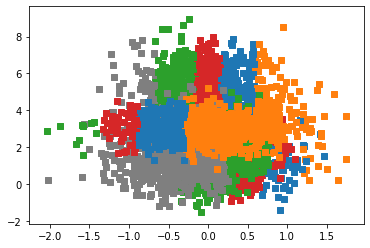

In [51]:
for i in range(0,4):
    for j in range(0,1000):
        if classified[j][i] == 4:
            plt.scatter(Z1[j][i], F2[j][i], c = "tab:orange", marker = "," )#,  alpha =0.1
        elif classified[j][i] == 3:
            plt.scatter(Z1[j][i], F2[j][i], c = "tab:grey",   marker = "," )#,  alpha =0.1
        elif classified[j][i] == 2:  
            plt.scatter(Z1[j][i], F2[j][i], c = "tab:red",    marker = "," )#,  alpha =0.1
        elif classified[j][i] == 1:  
            plt.scatter(Z1[j][i], F2[j][i], c = "tab:green",  marker = "," )#,  alpha =0.1 
        elif classified[j][i] == 5:   
            plt.scatter(Z1[j][i], F2[j][i], c = "tab:blue",   marker = "," )#,  alpha =0.1

plt.savefig("normalized Z1F2_tab.png")

---

## Step 4.1

In [ ]:
# #getting prediction
# # data是單一資料
# def prediction(data, mean_var):
#     pro = []
#     for k in range(1,6):
#         pro.append(stats.norm.pdf(data, mean_var['m'+str(k)], np.sqrt(mean_var['var'+str(k)])))
#             #stats.norm.pdf（X,mean,stander deviation）
#     prediction = np.argmax(pro)+1
#     return prediction
# # data是每次输入的单一数据点
# # mean_var是给X的东西，里面是F1或F2的mean和var，我这里是一个dictionary

In [61]:
average_var_Z1

[0.253138293396506,
 0.17999038226147424,
 0.19193840566723777,
 0.29664454992098727,
 0.26207702373693725]

In [62]:
average_mean_Z1

[0.000770483787765126,
 -0.018535038585591572,
 -0.042494826874893976,
 -0.05974375810143973,
 -0.034002989290916476]

In [70]:
#case 2: X = Z1
#repeat train step
average_var_Z1 = []
average_mean_Z1 = []
#calculate columns
for i in range(0,5):
    Z1_ = np.array(np.array(Z1)[0:100,[i]]) 
    var_f1 = np.var(Z1_)
    mean_f1 = np.mean(Z1_)
    average_var_Z1.append(var_f1)
    average_mean_Z1.append(mean_f1)
step1_Z1 = {}
for i in range(0,5):
    step1_Z1["m" + str(i+1) ] = average_mean_Z1[i]
    step1_Z1["var" + str(i+1) ] = average_var_Z1[i]


In [71]:
#test for Case 2
test_Z1 = testing_data(Z1)
orignalZ1 = []
predZ1 = []
for i in range(900):
    data1 = test_Z1[i]
    for j in range(5):
        orignalZ1.append(j+1)
        data2 = data1[j]
        predZ1.append(prediction(data2,step1_Z1)) 
right = 0
for num in range(len(predZ1)):
    if predZ1[num] == orignalZ1[num]:
        right = right + 1
acc = right / 4500
err = (4500-right) / 4500
print('Classification accuracy = '+str(round(acc,4)))
print('Error rate = '+str(round(err,4)))

Classification accuracy = 0.228
Error rate = 0.772
